In [1]:
import numpy as np
import pandas as pd
import json

In [7]:
file_paths = ['BLEData_Vishakh_2021_12_02.json','BLEData_Sharika_2022_03_26.json','BLEData_Prathibha_2022_05_14.json',
              'BLEData_mayukha_2022_04_25.json','BLEData_Elga_2022_05_04.json']

In [57]:
dfs = []
for path in file_paths:
     with open(path, 'r') as f:
        data = json.load(f)                  
        df = pd.json_normalize(data)         
        dfs.append(df)
 
        if isinstance(data, list):
            df = pd.DataFrame(data)
      
df_merged = pd.concat(dfs, ignore_index=True)

In [82]:
for i, df_merged in enumerate(dfs):
    print(f"Columns in DataFrame {i+1}:")
    print(list(df_merged.columns))
    print("-" * 40)

Columns in DataFrame 1:
['timezone', 'Start end time', 'Start_date_time', 'session_finish_time', 'session_id', 'user_id', 'recovery_thresh', 'u_id', 'user_device_id', 'ble_device_id', 'ts', 'ticks', 'start_time_in_utc', 'activities', 'captured_data.hr.ticks', 'captured_data.hr.RR in ms', 'captured_data.hr.HR in BPM', 'captured_data.hr.ECG QR Amplitude', 'captured_data.slp.ticks', 'captured_data.slp.sleep pos', 'captured_data.slp.sleep moment', 'captured_data.act.ticks', 'captured_data.act.step count', 'captured_data.act.activity level', 'captured_data.bat.ticks', 'captured_data.bat.batlvl', 'captured_data.err.ticks', 'captured_data.err.errcode', 'session.created', 'session.modified', 'session.sid', 'session.session_name', 'session.app', 'session.user_id', 'session.ble_device_id', 'session.user_device_id', 'session.ticks', 'session.read_ptr', 'session.write_ptr', 'session.created_at', 'session.updated_at', 'session.finished_at', 'session.ticks_on_start', 'session.status', 'session.sync_

In [73]:
# select and rename several columns
df = df_merged
hr_df = df[['start_time_in_utc', 'captured_data.hr.HR in BPM', 'user_metadata.age', 'user_id']].copy()
hr_df.rename(columns={
    'start_time_in_utc': 'timestamp',
    'captured_data.hr.HR in BPM': 'heart_rate',
    'user_metadata.age': 'age'
}, inplace=True)
hr_df['heart_rate'] = hr_df['heart_rate'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


In [75]:
# Convert timestamp and clean data
hr_df['timestamp'] = pd.to_datetime(hr_df['timestamp'])
hr_df.dropna(subset=['heart_rate', 'timestamp', 'age', 'user_id'], inplace=True)
user_ids = hr_df['user_id'].unique()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

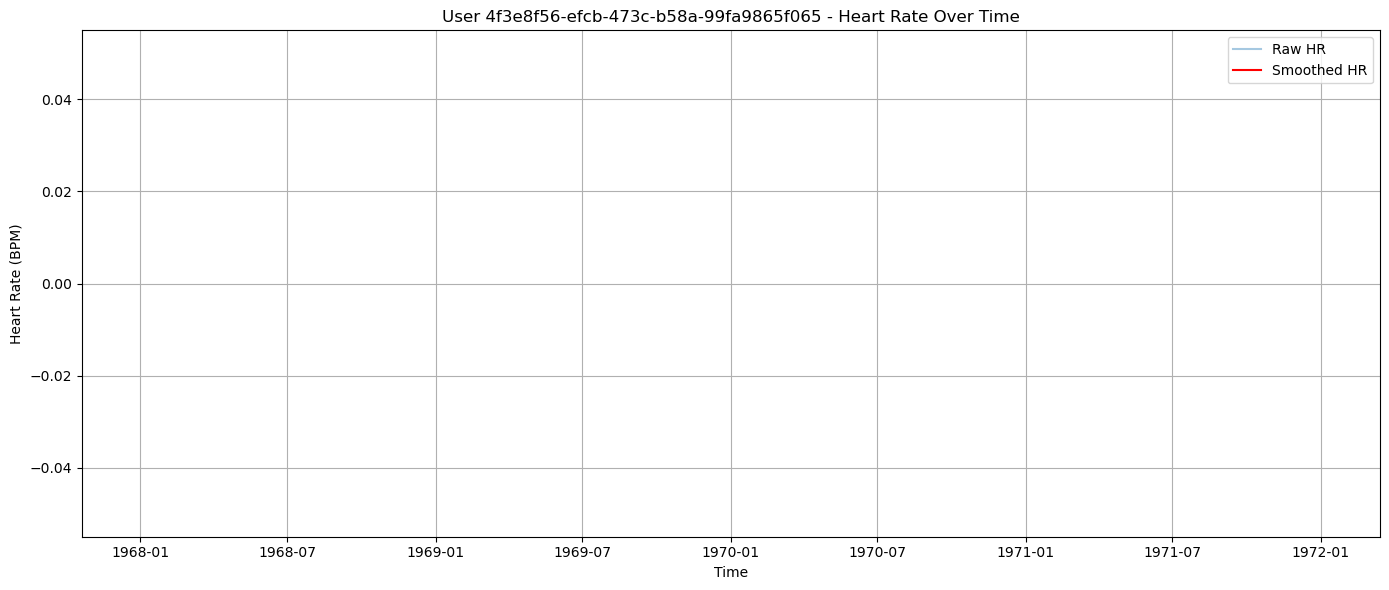

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

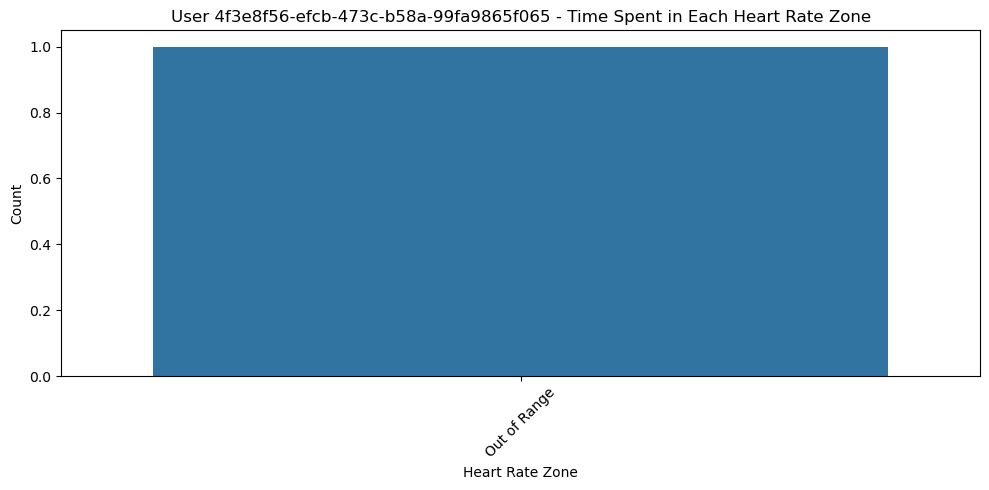


User 4f3e8f56-efcb-473c-b58a-99fa9865f065 - Heart Rate Zone Summary:
              count  mean  min  max
hr_zone                            
Out of Range      1   0.0    0    0
No peak HR activity detected for user 4f3e8f56-efcb-473c-b58a-99fa9865f065.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

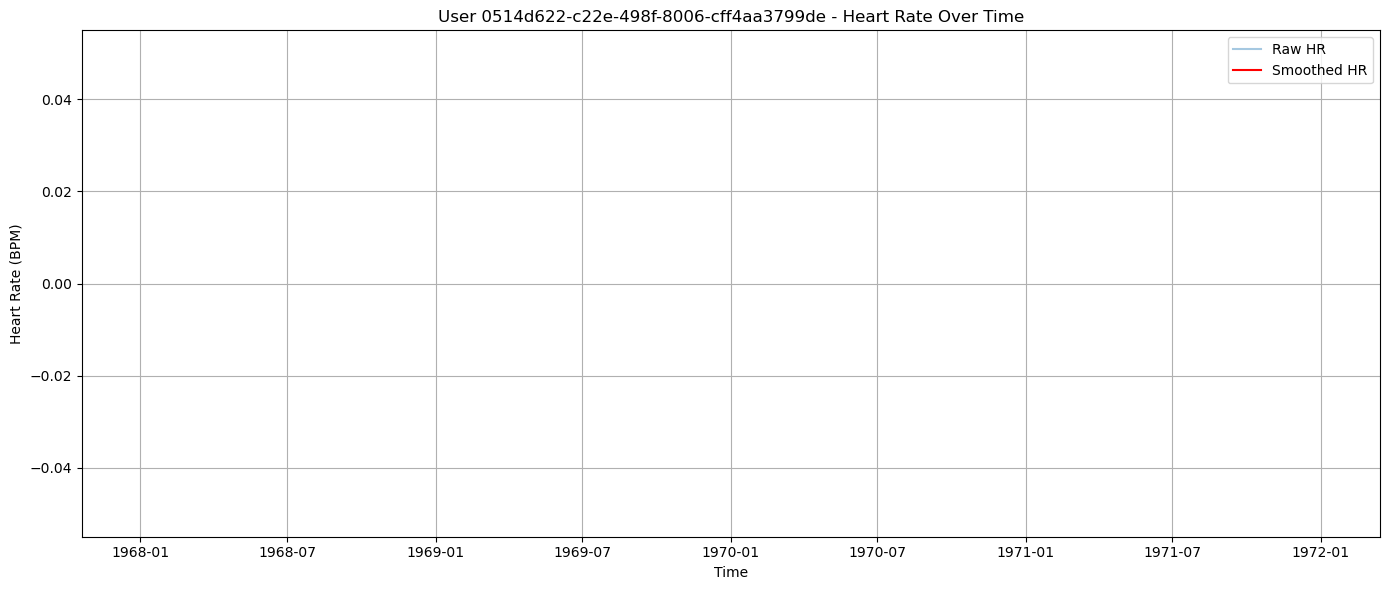

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

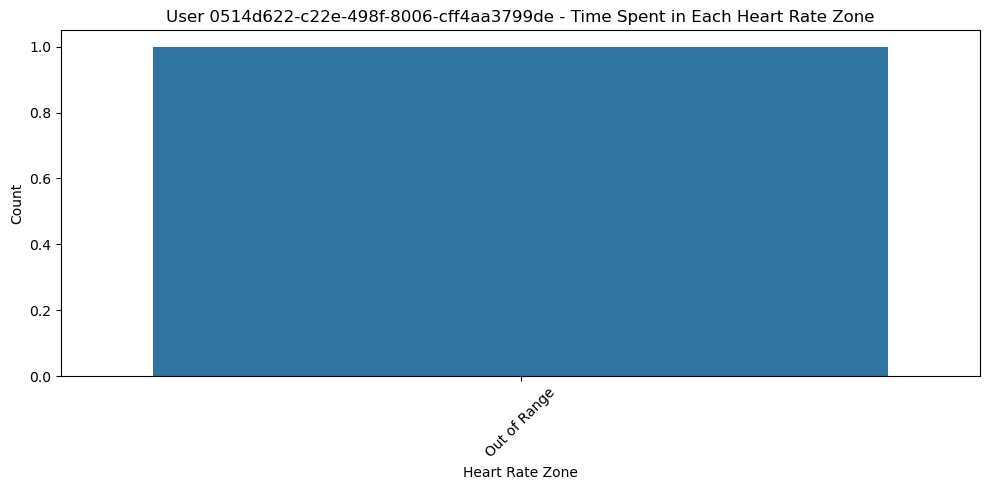


User 0514d622-c22e-498f-8006-cff4aa3799de - Heart Rate Zone Summary:
              count  mean  min  max
hr_zone                            
Out of Range      1   0.0    0    0
No peak HR activity detected for user 0514d622-c22e-498f-8006-cff4aa3799de.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

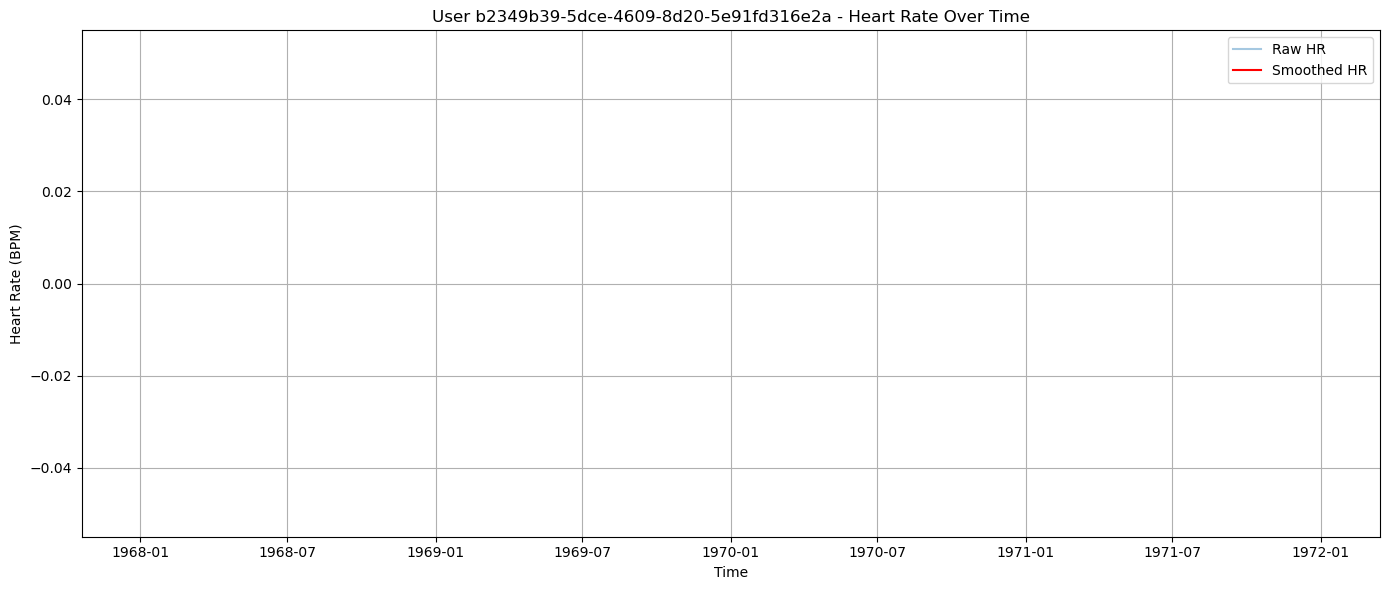

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

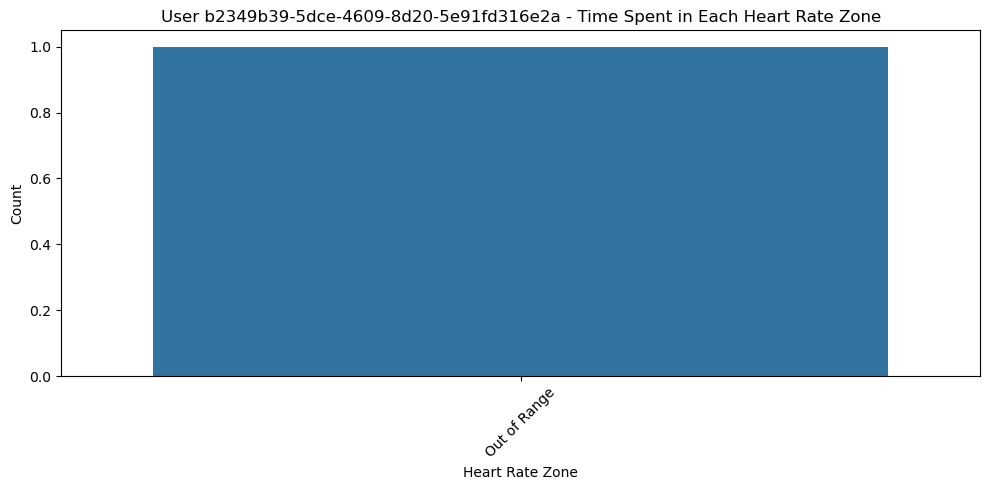


User b2349b39-5dce-4609-8d20-5e91fd316e2a - Heart Rate Zone Summary:
              count  mean  min  max
hr_zone                            
Out of Range      1   0.0    0    0
No peak HR activity detected for user b2349b39-5dce-4609-8d20-5e91fd316e2a.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

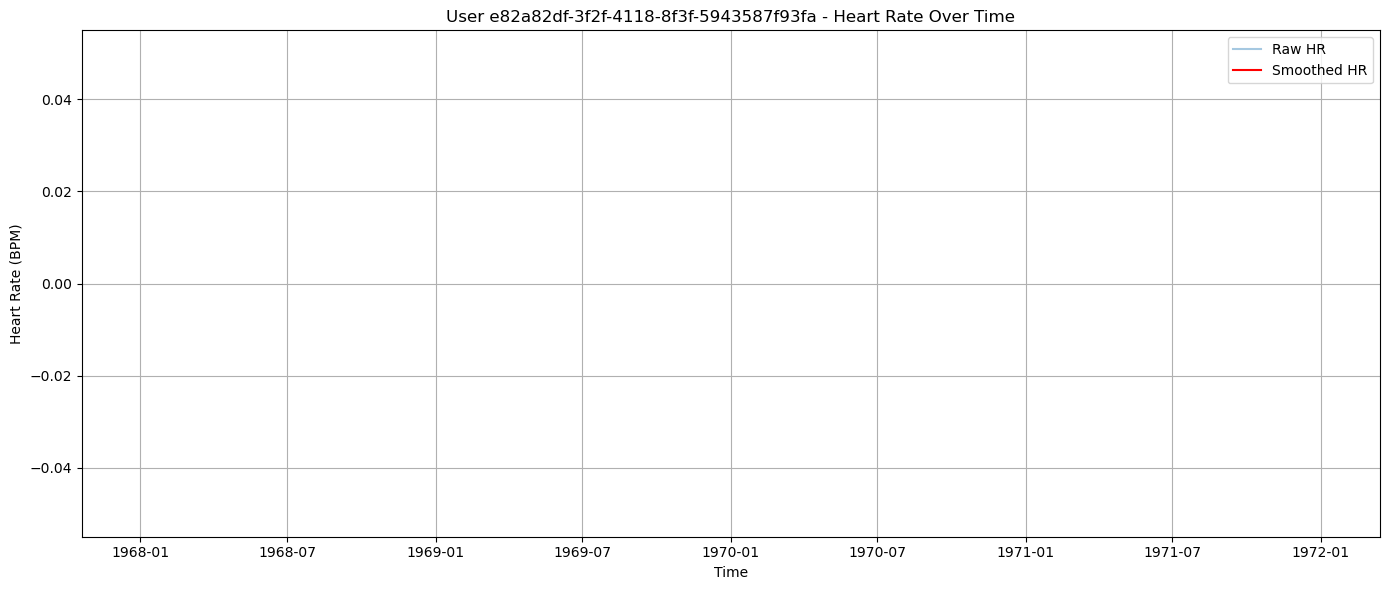

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

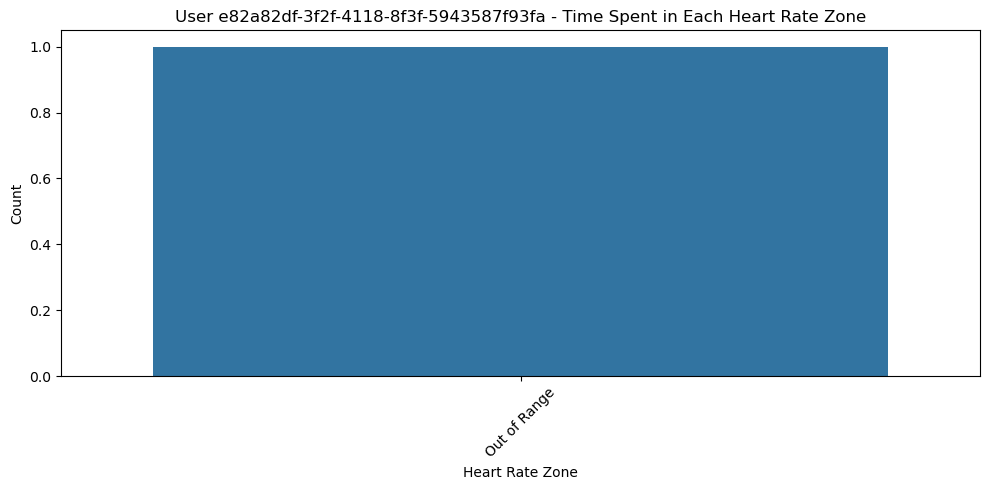


User e82a82df-3f2f-4118-8f3f-5943587f93fa - Heart Rate Zone Summary:
              count  mean  min  max
hr_zone                            
Out of Range      1   0.0    0    0
No peak HR activity detected for user e82a82df-3f2f-4118-8f3f-5943587f93fa.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

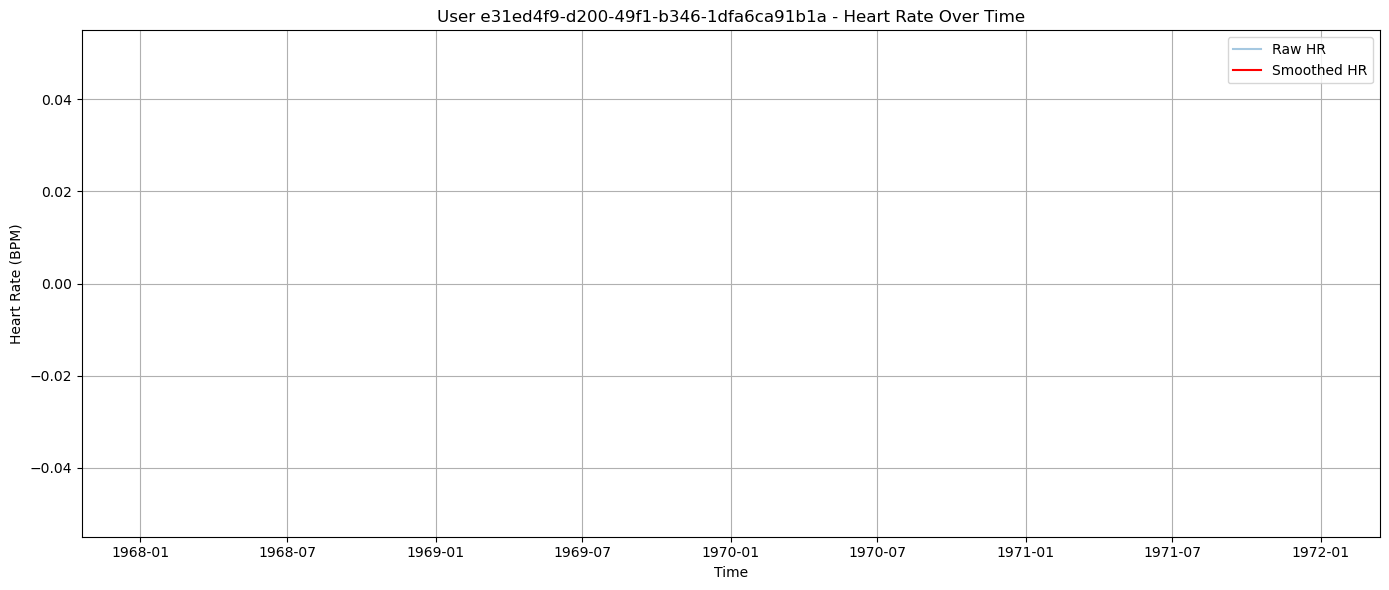

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

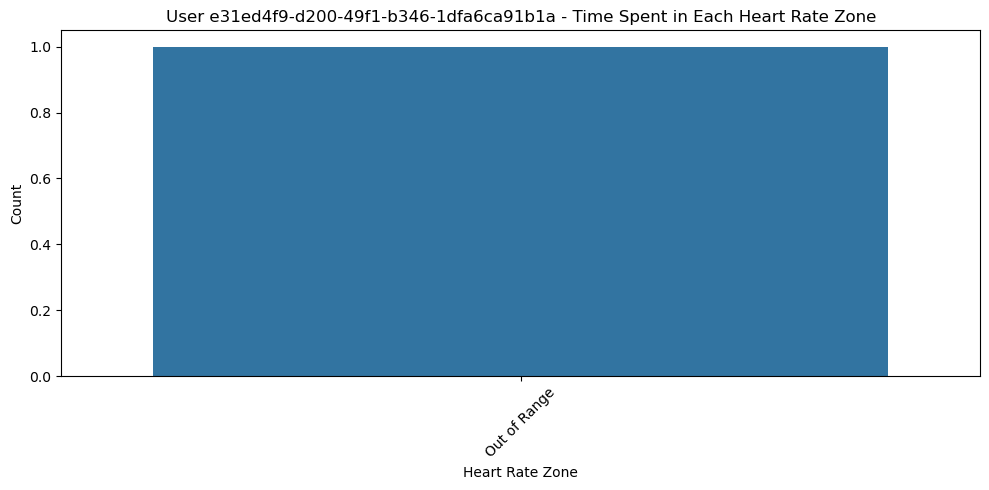


User e31ed4f9-d200-49f1-b346-1dfa6ca91b1a - Heart Rate Zone Summary:
              count  mean  min  max
hr_zone                            
Out of Range      1   0.0    0    0
No peak HR activity detected for user e31ed4f9-d200-49f1-b346-1dfa6ca91b1a.



In [77]:
for user in user_ids:
    user_data = hr_df[hr_df['user_id'] == user].copy()
    user_data.sort_values('timestamp', inplace=True)
    user_data['hr_smoothed'] = user_data['heart_rate'].rolling(window=30, min_periods=1).mean()

    # Define HR zones
    age = user_data['age'].iloc[0]
    max_hr = 220 - age
    zones = {
        'Zone 1 (50–60%)': (0.5 * max_hr, 0.6 * max_hr),
        'Zone 2 (60–70%)': (0.6 * max_hr, 0.7 * max_hr),
        'Zone 3 (70–80%)': (0.7 * max_hr, 0.8 * max_hr),
        'Zone 4 (80–90%)': (0.8 * max_hr, 0.9 * max_hr),
        'Zone 5 (90–100%)': (0.9 * max_hr, 1.0 * max_hr)
    }

    def assign_zone(hr):
        for zone, (low, high) in zones.items():
            if low <= hr < high:
                return zone
        return 'Out of Range'

    user_data['hr_zone'] = user_data['heart_rate'].apply(assign_zone)

    # Plot HR over time
    plt.figure(figsize=(14,6))
    plt.plot(user_data['timestamp'], user_data['heart_rate'], label='Raw HR', alpha=0.4)
    plt.plot(user_data['timestamp'], user_data['hr_smoothed'], label='Smoothed HR', color='red')
    plt.title(f'User {user} - Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (BPM)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # HR zone distribution
    plt.figure(figsize=(10,5))
    sns.countplot(data=user_data, x='hr_zone', order=user_data['hr_zone'].value_counts().index)
    plt.title(f'User {user} - Time Spent in Each Heart Rate Zone')
    plt.xlabel('Heart Rate Zone')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # HR zone summary
    summary = user_data.groupby('hr_zone')['heart_rate'].agg(['count', 'mean', 'min', 'max'])
    print(f"\nUser {user} - Heart Rate Zone Summary:")
    print(summary)

    # Recovery estimation
    peak_times = user_data[user_data['heart_rate'] > 0.9 * max_hr]
    if not peak_times.empty:
        peak_time = peak_times.iloc[0]['timestamp']
        post_peak = user_data[user_data['timestamp'] > peak_time].head(60)
        recovery_drop = peak_times.iloc[0]['heart_rate'] - post_peak['heart_rate'].min()
        print(f"Estimated recovery drop for user {user}: {recovery_drop:.1f} bpm over ~1 min\n")
    else:
        print(f"No peak HR activity detected for user {user}.\n")
